<a href="https://colab.research.google.com/github/kirtirajput13/code_alpha_projects/blob/main/Unemployment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

df.columns = df.columns.str.strip()
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Rename columns for clarity
df.rename(columns={
    "Region": "State",
    "Date": "Month",
    "Frequency": "Frequency",
    "Estimated Unemployment Rate (%)": "UnemploymentRate",
    "Estimated Employed": "Employed",
    "Estimated Labour Participation Rate (%)": "ParticipationRate"
}, inplace=True)


In [ ]:
# Convert to datetime
df["Month"] = pd.to_datetime(df["Month"], format="%d-%m-%Y")

# Drop rows with missing data
df.dropna(inplace=True)

# Sort data
df.sort_values("Month", inplace=True)

# Check types and first few rows
print(df.dtypes)
df.head()


State                        object
Month                datetime64[ns]
Frequency                    object
UnemploymentRate            float64
Employed                      int64
ParticipationRate           float64
Region.1                     object
longitude                   float64
latitude                    float64
dtype: object


,State,Month,Frequency,UnemploymentRate,Employed,ParticipationRate,Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.7400
227,Tripura,2020-01-31,M,32.67,1508130,69.69,Northeast,23.9408,91.9882
40,Delhi,2020-01-31,M,22.23,5805284,47.79,North,28.7041,77.1025
217,Telangana,2020-01-31,M,5.49,17609295,59.25,South,18.1124,79.0193
207,Tamil Nadu,2020-01-31,M,1.57,26881641,41.96,South,11.1271,78.6569


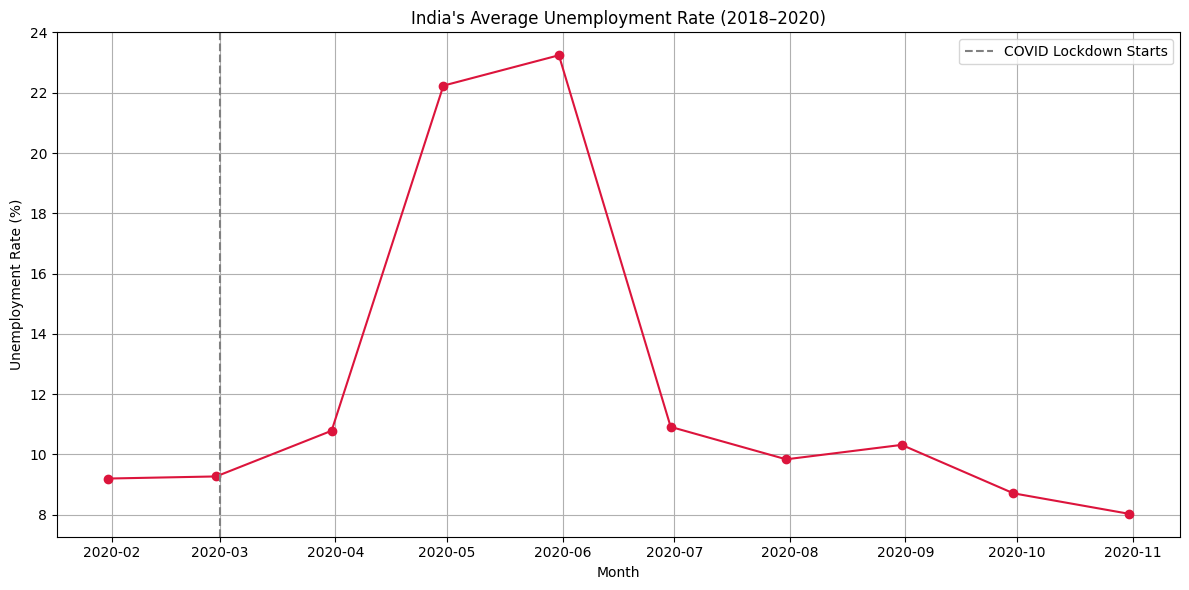

In [ ]:
df["Year"] = df["Month"].dt.year

# Average unemployment rate per month
monthly_avg = df.groupby("Month")["UnemploymentRate"].mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='crimson')
plt.axvline(pd.to_datetime("2020-03-01"), color='gray', linestyle='--', label="COVID Lockdown Starts")
plt.title("India's Average Unemployment Rate (2018–2020)")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


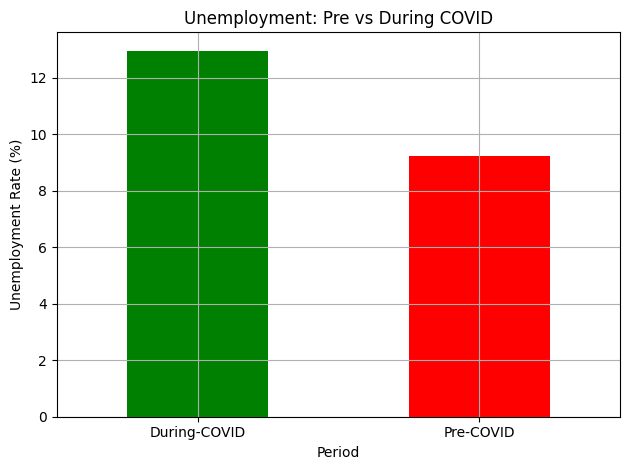

In [ ]:
df["Period"] = df["Month"].apply(lambda d: "Pre-COVID" if d < pd.to_datetime("2020-03-01") else "During-COVID")

# Average unemployment rate in both periods
covid_compare = df.groupby("Period")["UnemploymentRate"].mean()
covid_compare.plot(kind='bar', color=["green", "red"], title="Unemployment: Pre vs During COVID")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-1428774858.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette="Reds_r")


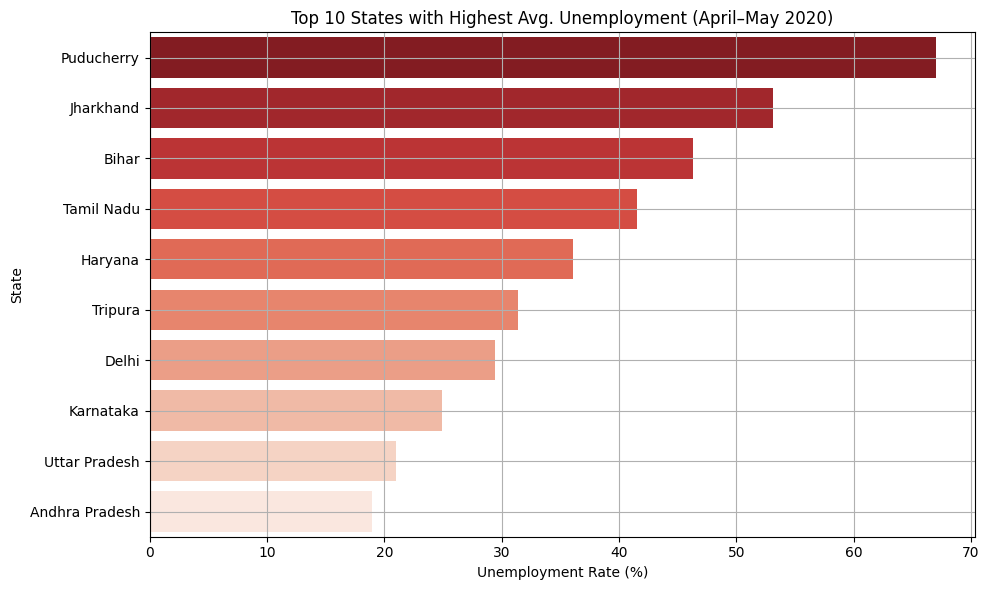

In [ ]:
# Filter data for April and May 2020
lockdown_months = df[
    (df["Month"].dt.year == 2020) & (df["Month"].dt.month.isin([4, 5]))
]

# Compute state-wise average unemployment during lockdown
state_avg = lockdown_months.groupby("State")["UnemploymentRate"].mean().sort_values(ascending=False).head(10)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=state_avg.values, y=state_avg.index, palette="Reds_r")
plt.title("Top 10 States with Highest Avg. Unemployment (April–May 2020)")
plt.xlabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


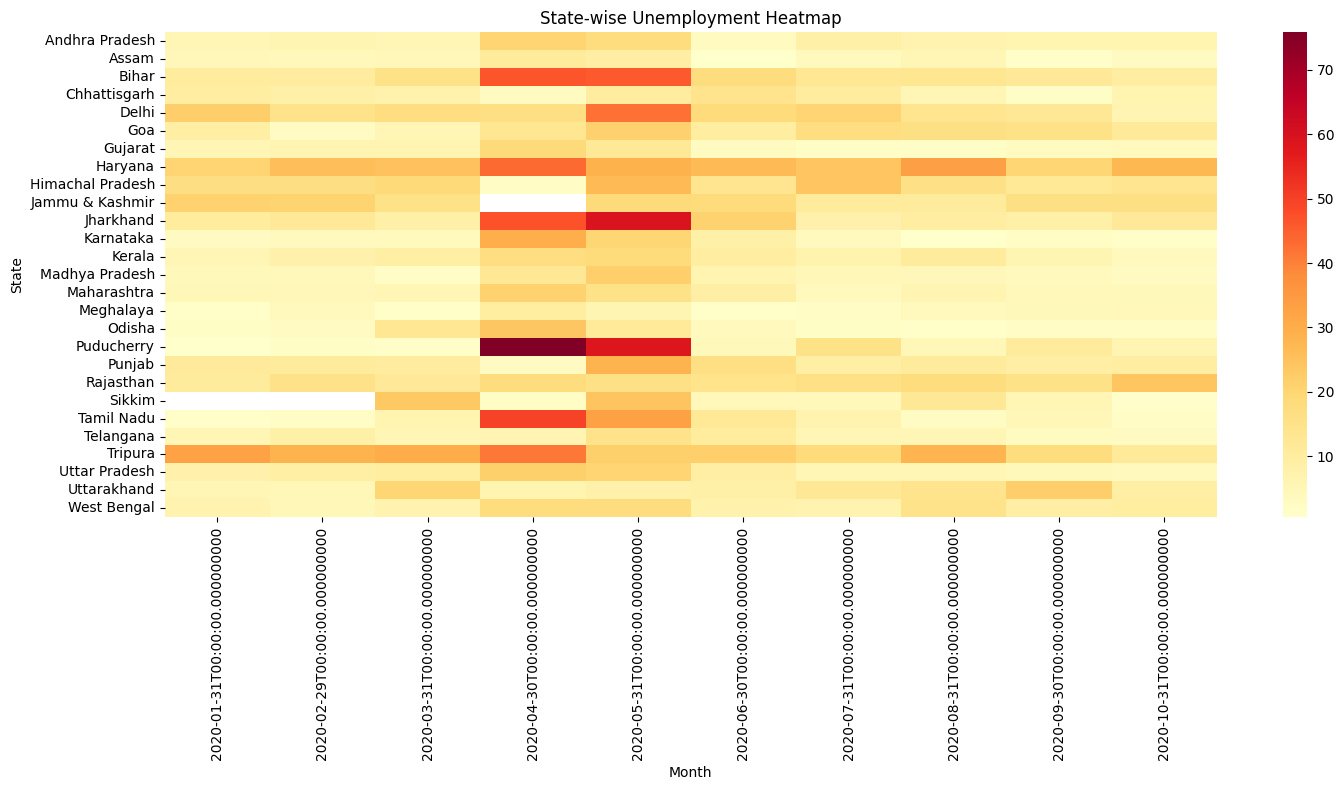

In [ ]:
import seaborn as sns

# Pivot table: rows = states, columns = months, values = unemployment rate
pivot = df.pivot_table(index="State", columns="Month", values="UnemploymentRate")

plt.figure(figsize=(15, 8))
sns.heatmap(pivot, cmap="YlOrRd", annot=False)
plt.title("State-wise Unemployment Heatmap")
plt.xlabel("Month")
plt.ylabel("State")
plt.tight_layout()
plt.show()


In [ ]:
print(df.columns)

Index(['State', 'Month', 'Frequency', 'UnemploymentRate', 'Employed',
       'ParticipationRate', 'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load unemployment data
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df.columns = df.columns.str.strip()
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df.rename(columns={
    "Date": "Month",
    "Estimated Unemployment Rate (%)": "UnemploymentRate"
}, inplace=True)

# Group by month and get national average
monthly_df = df.groupby("Month")["UnemploymentRate"].mean().reset_index()

# Prophet needs columns to be: ds (date) and y (value)
monthly_df = monthly_df.rename(columns={"Month": "ds", "UnemploymentRate": "y"})

print(monthly_df.head())


           ds          y
0  29-02-2020   9.266154
1  30-04-2020  22.236154
2  30-06-2020  10.911111
3  30-09-2020   8.705926
4  31-01-2020   9.196538


In [ ]:
model = Prophet()
model.fit(monthly_df)


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1136: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:290: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1teekm7m/ekasb9ns.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1teekm7m/mu07x2db.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstan

In [ ]:
future = model.make_future_dataframe(periods=12, freq='M')  # M = month
print(future.tail())


           ds
17 2021-06-30
18 2021-07-31
19 2021-08-31
20 2021-09-30
21 2021-10-31


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
forecast = model.predict(future)
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail())


           ds      yhat  yhat_lower  yhat_upper
17 2021-06-30  7.234774    0.828353   14.218733
18 2021-07-31  6.824710    0.499231   14.181933
19 2021-08-31  6.414646   -0.125423   12.815104
20 2021-09-30  6.017810   -0.728717   12.668143
21 2021-10-31  5.607746   -0.953917   11.973129


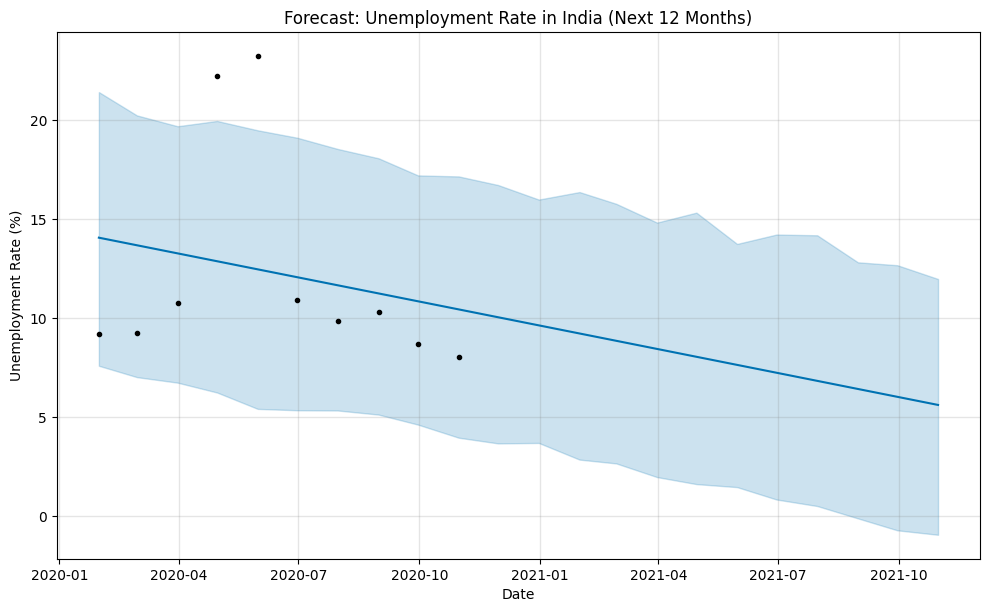

In [ ]:
fig1 = model.plot(forecast)
plt.title("Forecast: Unemployment Rate in India (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()
